# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Dataset

In [2]:
train_features_df = pd.read_csv("datasets/train_features.csv")
train_target_df = pd.read_csv("datasets/train_salaries.csv")
test_features_df = pd.read_csv("datasets/test_features.csv")

# Analysing Data

In [3]:
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_merge = pd.merge(train_features_df, train_target_df, on='jobId')

In [7]:
train_merge.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
train_merge.shape

(1000000, 9)

In [9]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [10]:
train_merge.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [11]:
train_merge.describe(include = 'all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685363322,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


# Numerical features correlation related to Salary

In [12]:
train_merge.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


<AxesSubplot:>

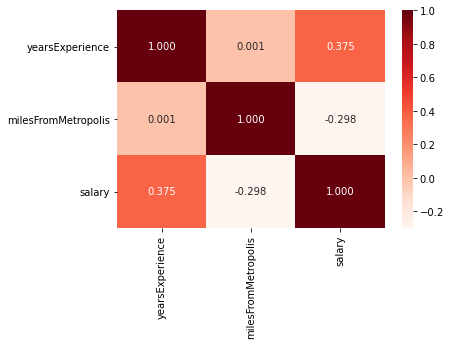

In [13]:
plt.figure(figsize=(6,4))
#plot heat map
sns.heatmap(train_merge.corr(),annot=True, fmt='.3f', cmap="Reds")

In [14]:
def cat_boxplot(df, target, feature):
    df_feature_mean = df.groupby([feature],as_index=False).mean()
    df_feature_sorted = df_feature_mean.sort_values(by=target)
    plt.figure()
    sns.boxplot(x=feature, y=target, data=df, order=df_feature_sorted[feature].values)
    plt.xticks(rotation=45)

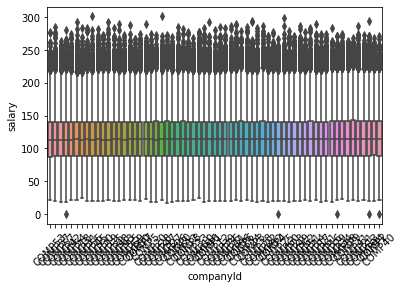

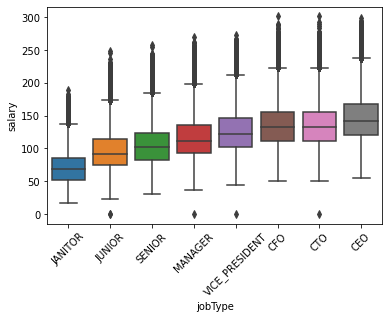

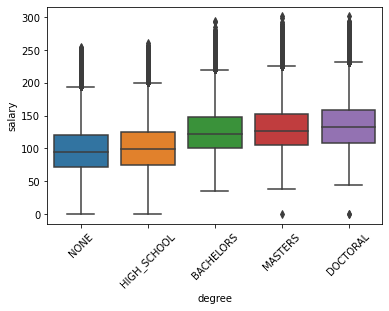

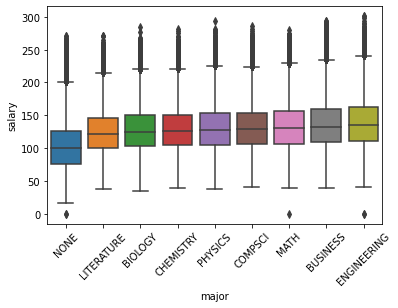

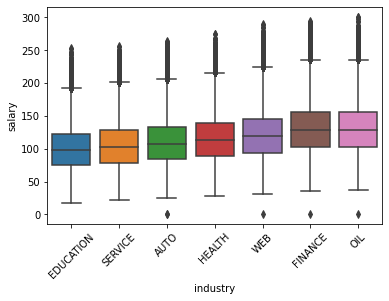

In [15]:
cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry']
target = 'salary'
for feature in cat_features:
    cat_boxplot(train_merge, target, feature)

In [16]:
cat_features.remove('companyId')

In [17]:
dummy_df = pd.get_dummies(train_merge[cat_features])

In [18]:
dummy_df.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [19]:
num_features = ['yearsExperience','milesFromMetropolis']
train_merge_Hot_Enc = train_merge[num_features].join(dummy_df)
train_merge_Hot_Enc.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


# Splitting the data into train test split

In [20]:
X=train_merge_Hot_Enc.values

In [21]:
X

array([[10, 83,  0, ...,  0,  0,  0],
       [ 3, 73,  1, ...,  0,  0,  1],
       [10, 38,  0, ...,  0,  0,  0],
       ...,
       [16, 81,  0, ...,  0,  0,  0],
       [ 6,  5,  0, ...,  0,  0,  0],
       [20, 11,  0, ...,  0,  0,  0]], dtype=int64)

In [22]:
y=train_merge['salary'].values

In [23]:
y

array([130, 101, 137, ...,  64, 149,  88], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1000000, 31) (750000, 31) (250000, 31)


# Applying StandardScaler on to the dataset

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train_scaled=scaler.fit_transform(X_train)

In [29]:
X_train_scaled

array([[ 2.79154960e-01,  3.97050774e-01, -3.77545068e-01, ...,
        -4.08019644e-01,  2.45249293e+00, -4.08755245e-01],
       [ 1.87037694e-03,  1.67876008e+00, -3.77545068e-01, ...,
        -4.08019644e-01,  2.45249293e+00, -4.08755245e-01],
       [ 1.87037694e-03,  1.60947850e+00, -3.77545068e-01, ...,
        -4.08019644e-01, -4.07748373e-01, -4.08755245e-01],
       ...,
       [-5.52698789e-01, -1.05786250e+00, -3.77545068e-01, ...,
        -4.08019644e-01, -4.07748373e-01, -4.08755245e-01],
       [-4.14056498e-01, -6.76813784e-01,  2.64869041e+00, ...,
        -4.08019644e-01, -4.07748373e-01,  2.44645179e+00],
       [-1.66183712e+00,  3.97050774e-01, -3.77545068e-01, ...,
        -4.08019644e-01, -4.07748373e-01, -4.08755245e-01]])

In [30]:
X_test_scaled = scaler.transform(X_test)

# Applying the model to the data and training the model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# Predicting the result

In [33]:
y_pred = regressor.predict(X_test_scaled)

# Actual value ------ Predicted value is given below

In [34]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[174.        , 142.26990334],
       [ 58.        ,  72.65540138],
       [168.        , 176.23987404],
       ...,
       [127.        , 119.58679787],
       [104.        ,  92.61353127],
       [109.        , 113.83191505]])

# Result Analysis

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


15.835630965035522
384.11873550101535
0.7447042892918833


# Performing K Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cvs = cross_val_score(regressor,X_train_scaled,y_train,cv=10)
cvs

array([0.74293021, 0.74065985, 0.74435854, 0.74303381, 0.7418405 ,
       0.74314762, 0.74397886, 0.74560726, 0.7428276 , 0.74271929])

In [39]:
print(f' Accuracy is : {cvs.mean()}')

 Accuracy is : 0.7431103546190281


In [40]:
print(f' Standard deviation : {cvs.std()}')

 Standard deviation : 0.0012820642779096405


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


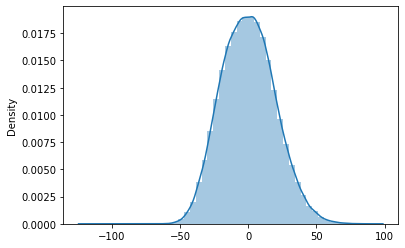

In [41]:
sns.distplot((y_test-y_pred))
plt.show()

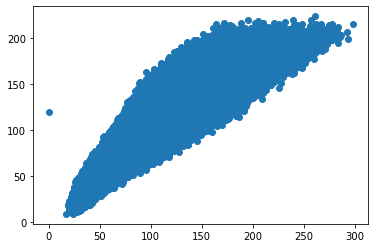

In [42]:
plt.scatter(y_test,y_pred)
plt.show()

In [43]:
regressor.intercept_

116.04700294484554

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


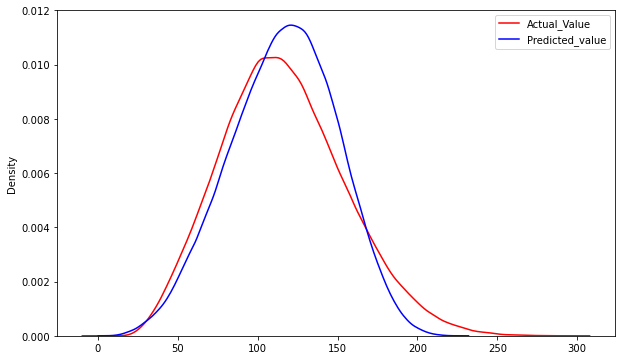

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(y_test, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b")
plt.legend(labels=['Actual_Value','Predicted_value'])
plt.show()

# Working With  Another test dataset

In [45]:
test_features_df.drop(['companyId', 'jobId'],axis = 1)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [46]:
test_features_df.value_counts('jobType')

jobType
VICE_PRESIDENT    125434
JANITOR           125253
SENIOR            125202
CFO               125092
JUNIOR            125022
CEO               124941
CTO               124665
MANAGER           124391
dtype: int64

<AxesSubplot:xlabel='jobType', ylabel='count'>

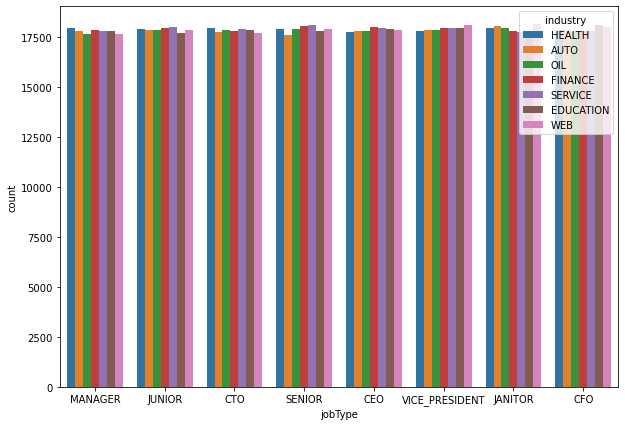

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(x = "jobType", hue= "industry", data = test_features_df)
#plt.xticks(rotation=45)


In [48]:
test_features_df_enc=pd.get_dummies(test_features_df[['jobType','degree','major','industry']])
test_features_df_enc

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
999996,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
999997,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
999998,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


# New test_features_df including all columns

In [49]:
test_features_df=test_features_df[['yearsExperience','milesFromMetropolis']].join(test_features_df_enc)
test_features_df

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,14,3,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
999996,20,67,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
999997,1,91,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
999998,14,63,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [50]:
test_features = test_features_df.values

# Performing StandardScaler

In [51]:
test_features_scaled = scaler.transform(test_features)

In [52]:
test_features_scaled

array([[ 1.38829329,  0.81274028, -0.37754507, ..., -0.40801964,
        -0.40774837, -0.40875525],
       [ 1.11100871, -0.08792032, -0.37754507, ..., -0.40801964,
        -0.40774837, -0.40875525],
       [ 0.69508183, -1.40427042, -0.37754507, ..., -0.40801964,
        -0.40774837, -0.40875525],
       ...,
       [-1.52319483,  1.43627454, -0.37754507, ...,  2.45086239,
        -0.40774837, -0.40875525],
       [ 0.27915496,  0.46633236, -0.37754507, ...,  2.45086239,
        -0.40774837, -0.40875525],
       [ 0.55643954, -0.64217299, -0.37754507, ...,  2.45086239,
        -0.40774837, -0.40875525]])

In [53]:
test_salary_predict = regressor.predict(test_features_scaled)

In [54]:
test_salary_predict

array([115.61441627,  92.0941526 , 166.81119362, ...,  45.10568825,
       164.46726051, 111.75583473])

# Add the numpy array to Column of the Dataset

In [55]:
Predicted_Salary=pd.DataFrame(data=test_salary_predict, columns=["Predicted_salary"])

In [56]:
Predicted_Salary

,Predicted_salary
0,115.614416
1,92.094153
2,166.811194
3,105.387915
4,118.817846
...,...
999995,168.342016
999996,110.315588
999997,45.105688
999998,164.467261


In [57]:
test_features_df['Predicted_Salaries']=Predicted_Salary

In [58]:
test_features_df

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,Predicted_Salaries
0,22,73,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,115.614416
1,20,47,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,92.094153
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,166.811194
3,14,96,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,105.387915
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,118.817846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,14,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,168.342016
999996,20,67,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,110.315588
999997,1,91,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,45.105688
999998,14,63,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,164.467261
